## Flow chart for the clustering algorithm

In [13]:
from graphviz import Digraph

dot = Digraph('Algortihm for Clustering', node_attr={'style': 'filled'})

# Adjusting Paremeters of the graph
# Add a title
dot.attr(label='Algortihm for Clustering \n\n', 
         labelloc='t',
         fontsize='30',      # Adjust this for size
         fontcolor='black',    # Adjust this for color
         labeljust='c',      # Centered; use 'l' for left and 'r' for right
        )

# Define the direction of the flow ('TB' Top-Bottom or 'LR' Low-Right) 
dot.attr(rankdir='TP')

# Adjust Node Spacing
dot.attr(ranksep='1')

# Setting colors for nodes
dot.node('A', 'Initial locations of \n cluster heads', shape='box', fillcolor='lightblue', fontcolor='black', color='black')
dot.node('B', 'Find boundaries \n beteen clusters', shape='box', fillcolor='lightblue')
dot.node('C', 'Compute square residual (D) \n between data points \n and clusters (distance)', shape='box', fillcolor='lightblue')

# Conditional diamond node
dot.node('D', 'Is residual (D) < E \n (epsilon --> tolerance)', shape='diamond', fillcolor='lightpink')

# Paths based on condition
dot.node('D1', 'Stop', shape='box', fillcolor='lightblue')
dot.node('D2', 'Set  k = k + 1 (number of iterations) \n and find new cluster (centroids).', shape='box', fillcolor='lightcoral')

# Setting colors for edges
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'D1', label='Yes')
dot.edge('D', 'D2', label='No')
dot.edge('D2', 'A', label='Start again')  # Looping back edge

#dot.render('analytics_flowchart', format='png', view=True)

## Datapoints 

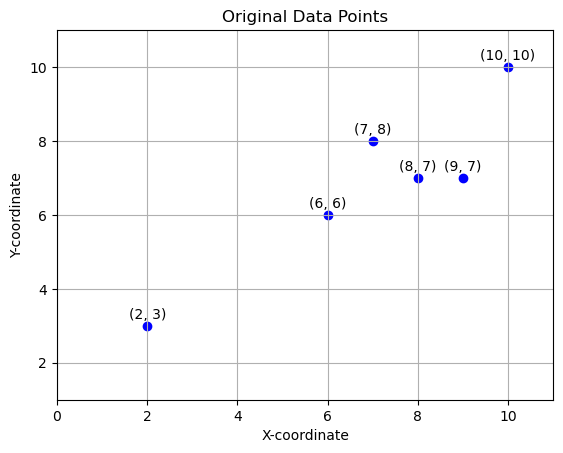

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import visualize_data

# Datapoints from exapmle in the book of reference.
X = np.array(([2,3],[6,6],[7,8],[8,7],[9,7],[10,10]))

visualize_data.plot_data(X, title="Original Data Points")

## Clusters initialization

- The 1st cluster is initialized as the average of all data points.
- the 2nd cluster is computed as the sum of the 1st cluster with a defined value <b>(Improve this criterium)</b>

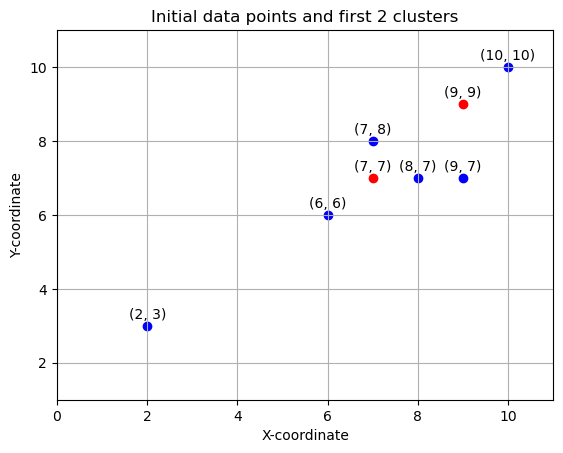

In [15]:
# 1st initial cluster = Average of datapoints 
CH = np.zeros((1,X.shape[1])) 
CH[0] = np.round(np.mean(X, axis=0))
CH = CH.astype(int) # For eliminate the ".0" in the graph

# Define the tolerance E 
E = 2

# Next Cluster using adding the E
CH = np.vstack((CH, CH[CH.shape[0]-1] + E)) # Add the new cluster at the bottom

# Sort cluster array
CH = np.sort(CH, axis=0)

visualize_data.plot_data(X, CH=CH, show_CHs=True, title='Initial data points and first 2 clusters')


## Performing clustering algorithm

### Flow chart for the clustering addition process

In [16]:
from graphviz import Digraph

dot = Digraph('Cluster Update Process', 
              node_attr={'style': 'filled',
                         'shape': 'box',
                         'fillcolor':'lightblue',  
                         'fontcolor': 'black', 
                         'color': 'black'}, 
              engine='circo', 
              )

# Adjusting Paremeters of the graph
dot.attr(label='Cluster Update Process \n\n', 
        labelloc='t',
        fontsize='30',
        fontcolor='black',
        labeljust='c', 
        rankdir='TP',
        ranksep='1')

# Setting the nodes
dot.node('A', 'Find the boundaries \n between the innitial \n clusters')
dot.node('B', 'Group clusters with their \n corresponding datapoints')
dot.node('C', 'Compute square \n residual (D) \n between data points \n and clusters')
dot.node('D', 'Compute the new cluster \n positions based \n on the  average distance \n of their points')
dot.node('E', 'Find the boundaries \n between the updated \n clusters')

# Conditional diamond node
#dot.node('D', 'Is residual (D) < E \n (epsilon --> tolerance)', shape='diamond', fillcolor='lightpink')

# Paths based on condition
#dot.node('D1', 'Stop', shape='box', fillcolor='lightblue')
#dot.node('D2', 'Set  k = k + 1 (number of iterations) \n and find new cluster (centroids).', shape='box', fillcolor='lightcoral')

# Setting colors for edges
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'E', label='Start again')  # Looping back edge
dot.edge('E', 'B')

# dot.edge('D', 'D1', label='Yes')
# dot.edge('D', 'D2', label='No')
# dot.edge('D2', 'A', label='Start again')  # Looping back edge

#dot.render('clustes_update_process', format='png', view=True)

### Relocating Clusters

Once the first 2 clusters are placed it is necessary to relocate them based on the average of the point that belong to each one of them.

#### Initial stage

1. Find boundaries between the initital clusters.
2. Allocate data points to their corresponding clusters based on the minimal distance to a cluster.
3. Compute the squared residual between measurements and the initial clusters.
4. Recalculate cluster positionns based on the average of the data points that belong to each of them. 
5. Find the new boundaries between these recalculated clusters.
6. Assign data points to their corresponding clusters with the new recalculated clusters.
6. Compute the squared residual between measurements and the recalculated clusters.

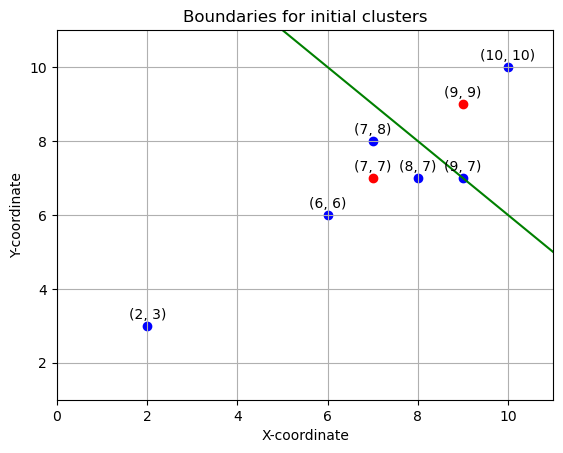

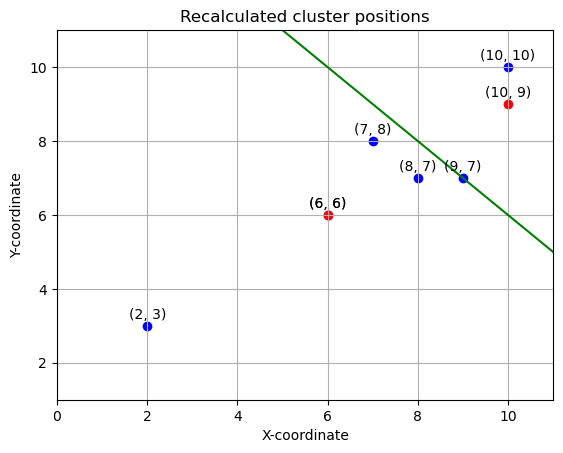

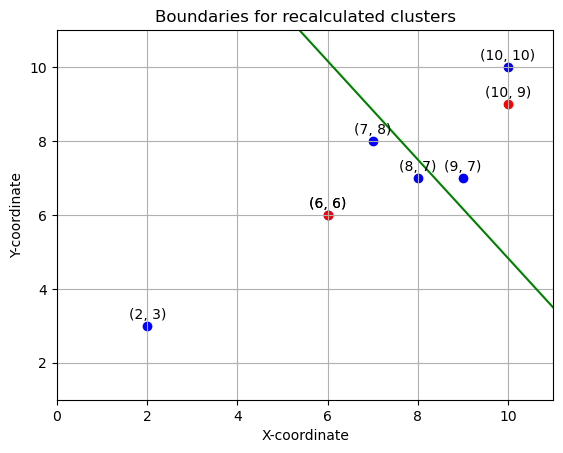

In [17]:
import utils

# !!!! INITIAL STAGE !!!!

D = 0 # Square Residual between measurements

# Step 1: Find boundaries between the initital clusters.
boundaries_points, boundaries_lines_m, boundaries_lines_b = utils.find_boundaries(X, CH, title='Boundaries for initial clusters')

# Step 2: Assign the points to their corresponding clusters
cluster_points = utils.allocate_datapoints(X, CH, boundaries_lines_m, boundaries_lines_b)

# Step 3: Compute the squared residual between measurements and the initial clusters.
D_new = utils.compute_D(CH, cluster_points)

# Step 4: Recalculate cluster positionns based on the average of the data points that belong to each of them.
new_CHs = utils.compute_centroids(X, CH.copy(), cluster_points, boundaries_points, boundaries_lines_m, boundaries_lines_b, title='Recalculated cluster positions')

# Update clusters
CH = new_CHs 

# Update D
D = D_new

# Step 5: Find the new boundaries between these recalculated clusters.
boundaries_points, boundaries_lines_m, boundaries_lines_b = utils.find_boundaries(X, CH, title='Boundaries for recalculated clusters')

# Step 6: Assign data points to their corresponding clusters with the new recalculated clusters.
cluster_points = utils.allocate_datapoints(X, CH, boundaries_lines_m, boundaries_lines_b)

# Step 7: Compute the squared residual between measurements and clusters.
D_new = utils.compute_D(CH, cluster_points)

# Update clusters
CH = new_CHs 

### Looking for new clusters

Once the first 2 clusters are allocated in the optimal positions is time to start with the algorithm.

1. Evaluate if the actual square residual is too much greater then the previous one.
2. In case there is a need for adding new cluster to decrease this metric a new cluster will be added.
3. Find the farest euclidean distance from a node to its corresponding cluster. 
4. Evaluate the criterium that if this maximum distance is greater 2 times than the average euclidean distance from all data points (that belong to the same cluster) to the cluster (the cluster that contains the farest node). 
5. Find the new boundaries with the new added cluster. 
6. Assign data points to their corresponding clusters with the new clusters.
7. Recalculate cluster positionns based on the average of the data points that belong to each of them.
8. Compute the squared residual between measurements and clusters.

The farest node [2 3] has a distance of 5.0 to the cluster [6 6]
The average distance from the nodes to this cluster is 2.368033988749895
newCH = [4. 4.], last_CH = [6 6]


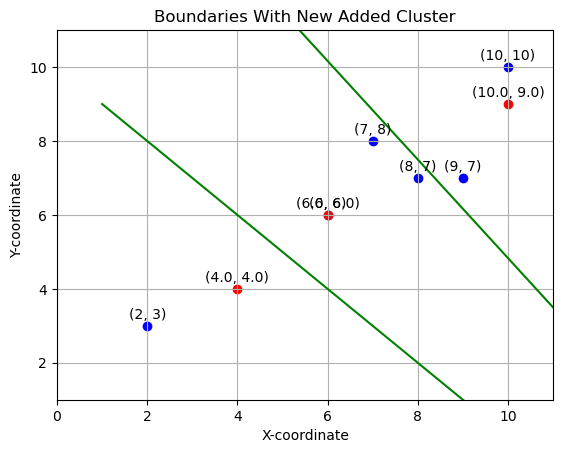

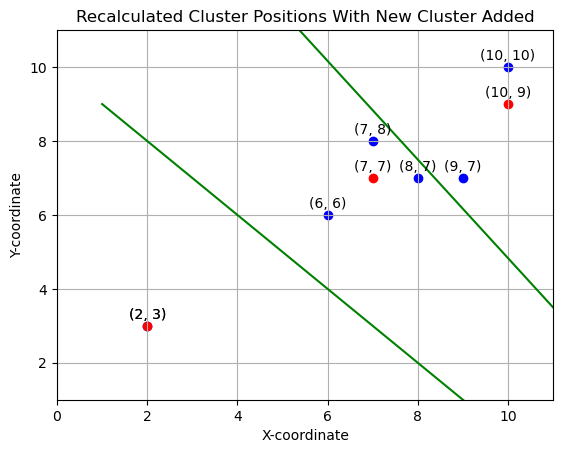

count: 0, D_new: 21.0, D = 41.0, CHs: [[ 4.  4.]
 [ 6.  6.]
 [10.  9.]]
The farest node [9 7] has a distance of 2.23606797749979 to the cluster [10  9]
The average distance from the nodes to this cluster is 1.618033988749895


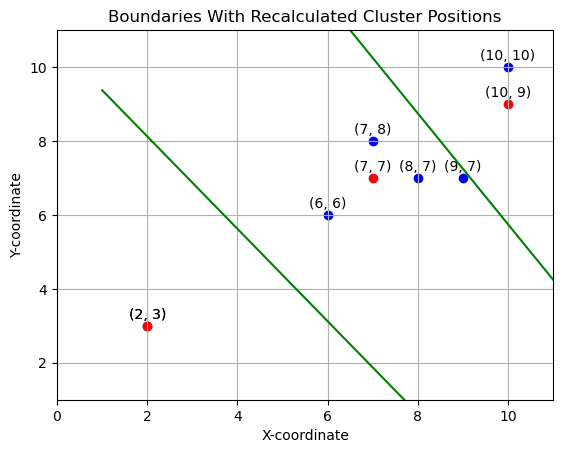

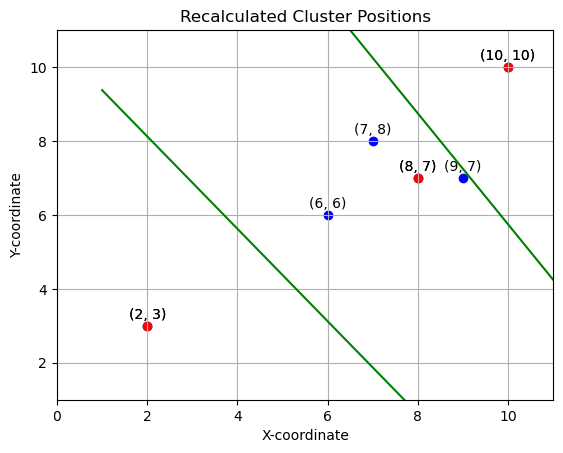

count: 1, D_new: 9.0, D = 21.0, CHs: [[ 2  3]
 [ 7  7]
 [10  9]]
The farest node [6 6] has a distance of 2.23606797749979 to the cluster [8 7]
The average distance from the nodes to this cluster is 1.1625703849682212


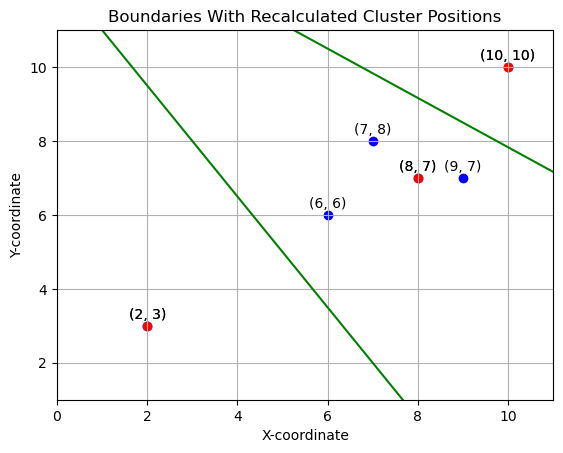

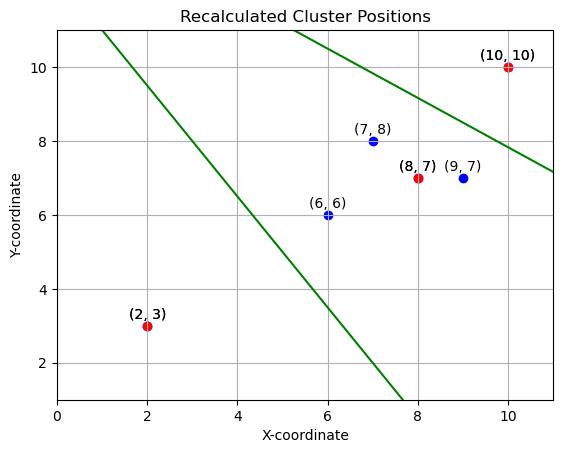

count: 2, D_new: 8.0, D = 9.0, CHs: [[ 2  3]
 [ 8  7]
 [10 10]]
The farest node [6 6] has a distance of 2.23606797749979 to the cluster [8 7]
The average distance from the nodes to this cluster is 1.1625703849682212


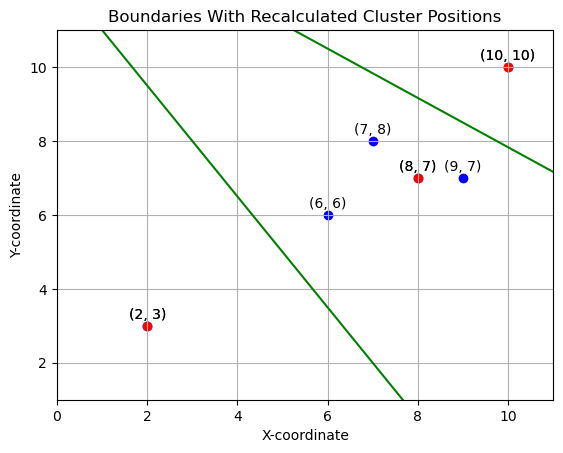

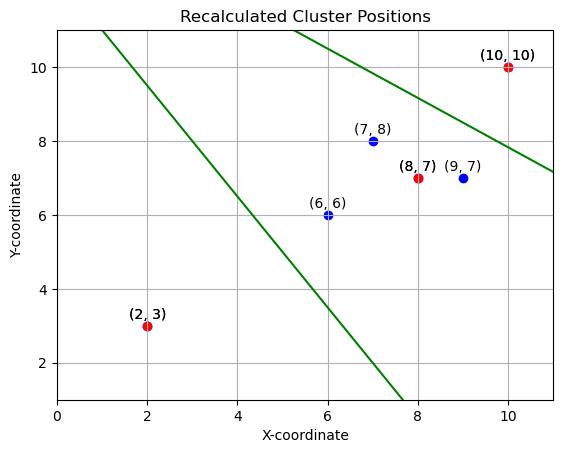

count: 3, D_new: 8.0, D = 8.0, CHs: [[ 2  3]
 [ 8  7]
 [10 10]]


In [18]:
cont = 0 # Counter for reference
added = False

while abs((D_new- D) / D_new) >= 0.1 and cont < 10: # Stop Criterium
    
    # Update D
    D = D_new

    # It is necessary to add a new cluster
    # Step 3: Find the farest distance from a node to its corresponding cluster. 
    dist_max_cluster, dist_max_point, dist_max, avg_dist = utils.find_farest_node(CH, cluster_points)
    
    # Step 4: Evaluate the criterium.
    if dist_max > (avg_dist * 2):
        # Compute the new cluster to add
        new_CH = utils.add_centroid(dist_max_cluster, dist_max_point, dist_max)
        CH = np.vstack((CH,new_CH))
        CH = np.sort(CH, axis=0)
        added = True

    # Step 5: Find the new boundaries with the new added cluster. 
    if added:
        boundaries_points, boundaries_lines_m, boundaries_lines_b = utils.find_boundaries(X, CH, title='Boundaries With New Added Cluster')
    else:
        boundaries_points, boundaries_lines_m, boundaries_lines_b = utils.find_boundaries(X, CH, title='Boundaries With Recalculated Cluster Positions')

    # Step 6: Assign data points to their corresponding clusters with the new clusters.
    cluster_points = utils.allocate_datapoints(X, CH, boundaries_lines_m, boundaries_lines_b)

    # Step 7: Recalculate cluster positionns based on the average of the data points that belong to each of them.
    if added:
        new_CHs = utils.compute_centroids(X, CH.copy(), cluster_points, boundaries_points, boundaries_lines_m, boundaries_lines_b,
                                          title='Recalculated Cluster Positions With New Cluster Added')
    else:
        new_CHs = utils.compute_centroids(X, CH.copy(), cluster_points, boundaries_points, boundaries_lines_m, boundaries_lines_b,
                                          title='Recalculated Cluster Positions')
        
    # Step 8: Compute the squared residual between measurements and clusters.
    D_new = utils.compute_D(CH, cluster_points)
   
    print(f'count: {cont}, D_new: {D_new}, D = {D}')   

    # Updating variables
    CH = new_CHs    
    cont += 1
    added = False